# PERBANDINGAN ALGORITMA KNN & SVM

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Data Understanding

Memuat dataset latih dan dataset uji

In [3]:
df_klasifikasi_train = pd.read_csv("ObesityDataSet_Kaggle.csv")

df_klasifikasi_test = pd.read_csv("Testing.csv")


## Data Preparation 

Pisahkan fitur dan target untuk dataset latih dan uji

In [4]:
X_train = df_klasifikasi_train[['Gender', 'Age', 'Height', 'Weight']]
y_train = df_klasifikasi_train['Label']

X_test_new = df_klasifikasi_test[['Gender', 'Age', 'Height', 'Weight']]
y_test_new = df_klasifikasi_test['Label']


Definisikan preprocessor untuk fitur numerik dan kategorikal

In [5]:
numerical_features = ['Age', 'Height', 'Weight']
categorical_features = ['Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

Diagram lingkaran dari jumlah data latih dan uji

In [26]:
train_count = len(df_klasifikasi_train)
test_count = len(df_klasifikasi_test)

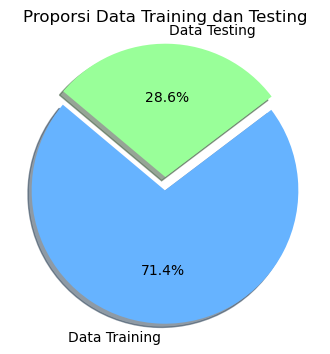

In [29]:
# Data untuk diagram lingkaran
sizes = [train_count, test_count]
labels = ['Data Training', 'Data Testing']
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)  # Memisahkan potongan pertama (data latih)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proporsi Data Training dan Testing')
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran sempurna
plt.show()

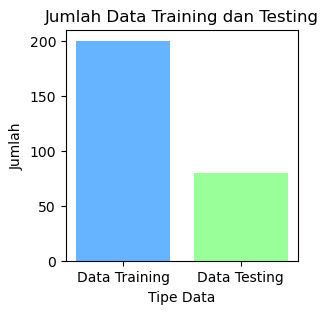

In [31]:
# Data untuk diagram batang
counts = [train_count, test_count]
labels = ['Data Training', 'Data Testing']
colors = ['#66b3ff', '#99ff99']

plt.figure(figsize=(3, 3))
plt.bar(labels, counts, color=colors)
plt.xlabel('Tipe Data')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Training dan Testing')
plt.show()

Tampilkan diagram batang dari jumlah atribut Age pada Training dan Testing

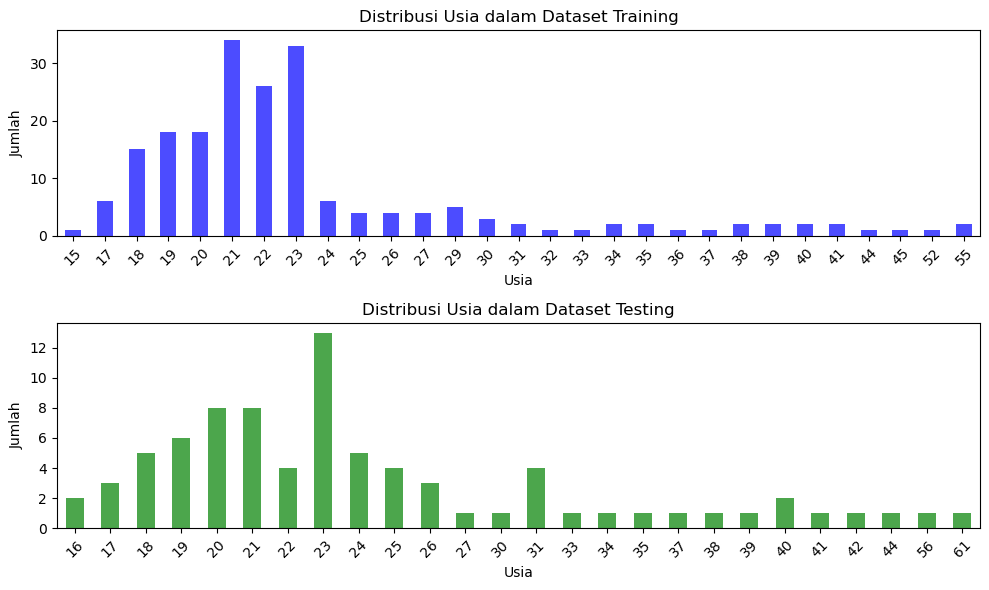

In [7]:
# Buat dua subplot secara vertikal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot untuk dataset latih
df_klasifikasi_train['Age'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title('Distribusi Usia dalam Dataset Training')
ax1.set_xlabel('Usia')
ax1.set_ylabel('Jumlah')
ax1.tick_params(axis='x', rotation=45)

# Plot untuk dataset testing
df_klasifikasi_test['Age'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title('Distribusi Usia dalam Dataset Testing')
ax2.set_xlabel('Usia')
ax2.set_ylabel('Jumlah')
ax2.tick_params(axis='x', rotation=45)

# Atur jarak antara subplot
plt.tight_layout()
plt.show()

Tampilkan diagram batang dari jumlah atribut Height

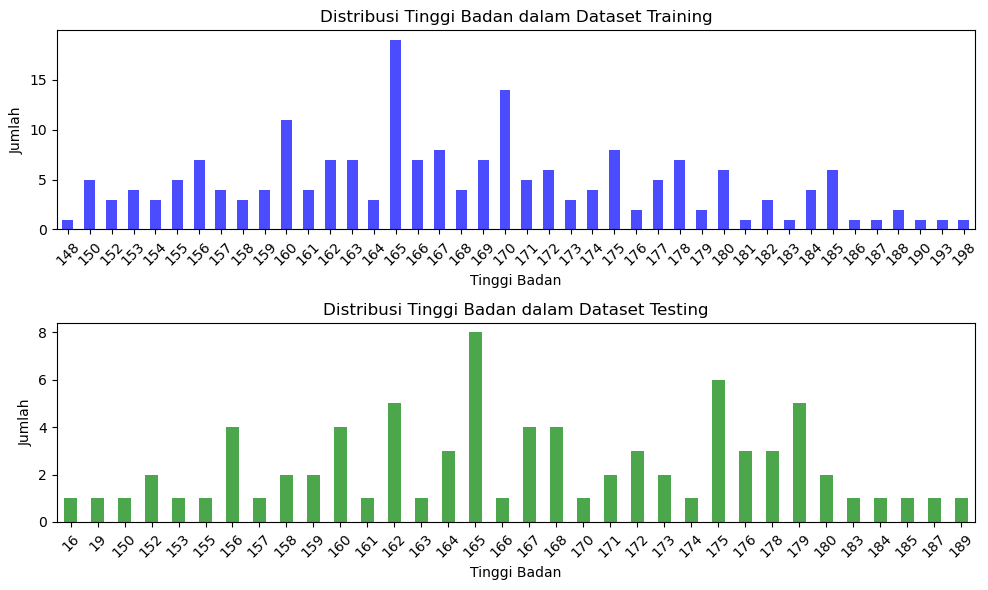

In [8]:
# Buat dua subplot secara vertikal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot untuk dataset latih
df_klasifikasi_train['Height'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title('Distribusi Tinggi Badan dalam Dataset Training')
ax1.set_xlabel('Tinggi Badan')
ax1.set_ylabel('Jumlah')
ax1.tick_params(axis='x', rotation=45)

# Plot untuk dataset testing
df_klasifikasi_test['Height'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title('Distribusi Tinggi Badan dalam Dataset Testing')
ax2.set_xlabel('Tinggi Badan')
ax2.set_ylabel('Jumlah')
ax2.tick_params(axis='x', rotation=45)

# Atur jarak antara subplot
plt.tight_layout()
plt.show()

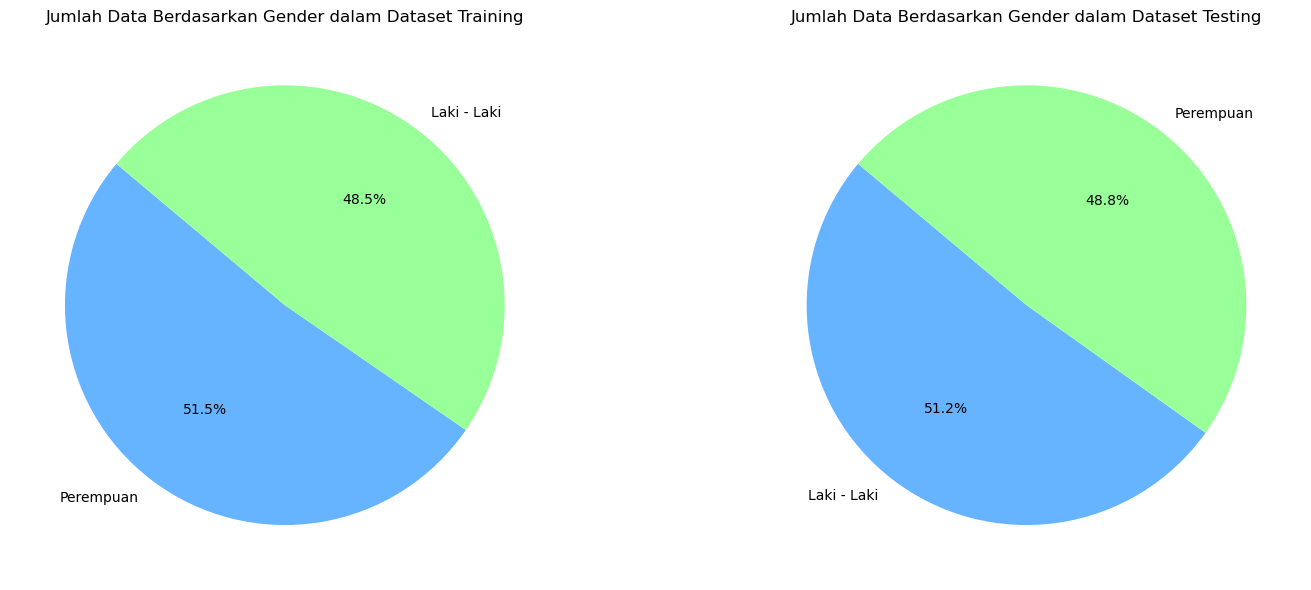

In [82]:
# Hitung jumlah data untuk setiap gender di dataset latih
gender_counts_train = df_klasifikasi_train['Gender'].value_counts()

# Hitung jumlah data untuk setiap gender di dataset testing
gender_counts_test = df_klasifikasi_test['Gender'].value_counts()

# Warna untuk setiap bagian diagram (biru muda untuk Female dan hijau muda untuk Male)
colors = ['#66b3ff', '#99ff99']  # RGB untuk biru muda dan hijau muda

# Buat figure dengan dua subplot sebelah-sebelah
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot untuk dataset latih
ax1.pie(gender_counts_train, labels=gender_counts_train.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Jumlah Data Berdasarkan Gender dalam Dataset Training')

# Plot untuk dataset testing
ax2.pie(gender_counts_test, labels=gender_counts_test.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax2.set_title('Jumlah Data Berdasarkan Gender dalam Dataset Testing')

# Tampilkan plot
plt.tight_layout()
plt.show()

Tampilkan diagram batang dari jumlah atribut Weight

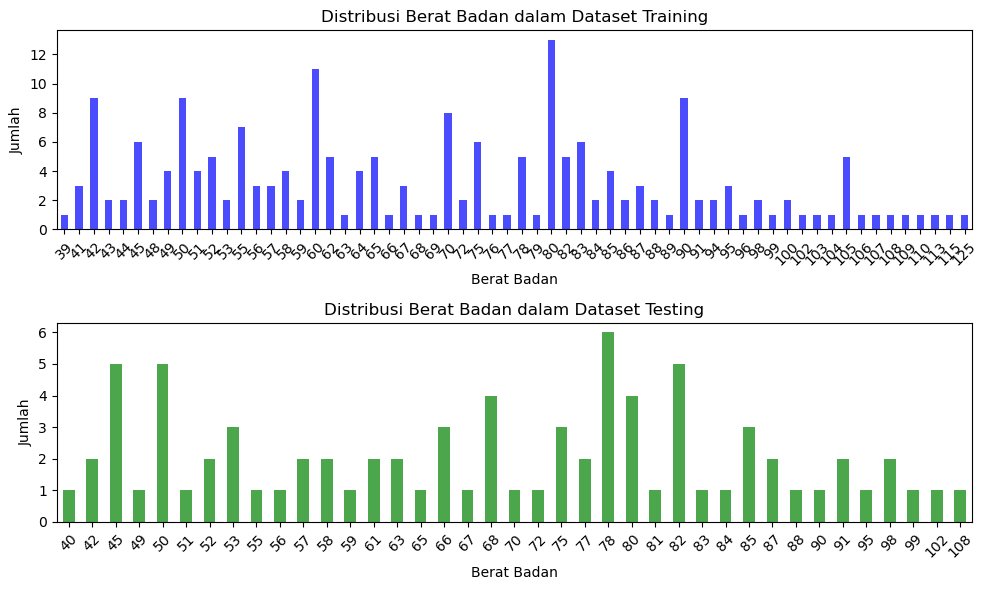

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot untuk dataset latih
df_klasifikasi_train['Weight'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title('Distribusi Berat Badan dalam Dataset Training')
ax1.set_xlabel('Berat Badan')
ax1.set_ylabel('Jumlah')
ax1.tick_params(axis='x', rotation=45)

# Plot untuk dataset testing
df_klasifikasi_test['Weight'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title('Distribusi Berat Badan dalam Dataset Testing')
ax2.set_xlabel('Berat Badan')
ax2.set_ylabel('Jumlah')
ax2.tick_params(axis='x', rotation=45)

# Atur jarak antara subplot
plt.tight_layout()
plt.show()

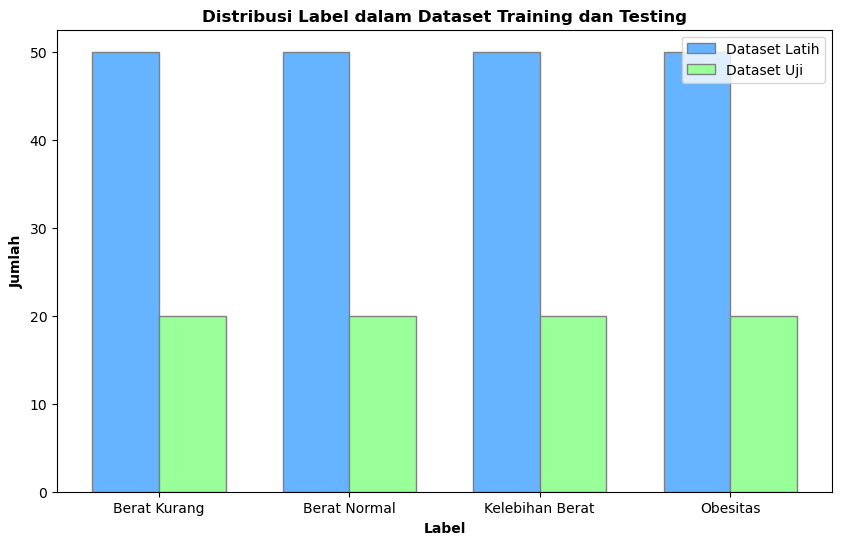

In [47]:
import matplotlib.pyplot as plt

# Menghitung distribusi label dari kedua dataset
train_label_counts = df_klasifikasi_train['Label'].value_counts().sort_index()
test_label_counts = df_klasifikasi_test['Label'].value_counts().sort_index()

# Mengambil semua label yang ada di kedua dataset
all_labels = sorted(set(train_label_counts.index).union(set(test_label_counts.index)))

# Mengatur lebar dari bar
bar_width = 0.35

# Membuat posisi bar
r1 = range(len(all_labels))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, train_label_counts, color='#66b3ff', width=bar_width, edgecolor='grey', label='Dataset Latih')
plt.bar(r2, test_label_counts, color='#99ff99', width=bar_width, edgecolor='grey', label='Dataset Uji')

# Menambahkan judul dan label sumbu
plt.xlabel('Label', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.title('Distribusi Label dalam Dataset Training dan Testing', fontweight='bold')

# Menambahkan label pada sumbu x
plt.xticks([r + bar_width / 2 for r in range(len(all_labels))], all_labels)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

# KNN

## Modeling 

Proses data dan Latih model KNN pada dataset latih

In [21]:
# Pipeline: Preprocessor + KNN
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=5))])

knn_model = knn_pipeline.fit(X_train, y_train)

Lakukan prediksi pada dataset TESTING

In [22]:
y_pred_new = knn_pipeline.predict(X_test_new)

## Evaluation 

Hitung matriks confusion

In [23]:
cm_new = confusion_matrix(y_test_new, y_pred_new)

Visualisasikan matriks confusion

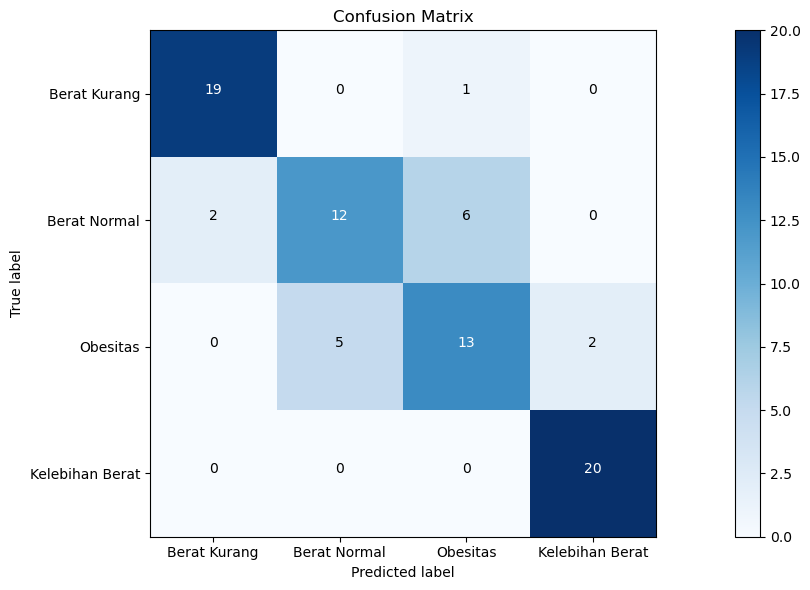

In [24]:
plt.figure(figsize=(16, 6))
plt.imshow(cm_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = y_test_new.unique()  # Mengambil kelas unik dari y_test_new
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(cm_new.shape[0]):
    for j in range(cm_new.shape[1]):
        plt.text(j, i, format(cm_new[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_new[i, j] > cm_new.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Hitung akurasi precision, recall, dan f1-score

In [25]:
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print('Akurasi Testing KNN :', accuracy_new)

P_new = precision_recall_fscore_support(y_test_new, y_pred_new, average='macro')
print("Precision : ", P_new[0])
print("Recall : ", P_new[1])
print("F Score : ", P_new[2])

Akurasi Testing KNN : 0.8
Precision :  0.7924337916984976
Recall :  0.7999999999999999
F Score :  0.794464717330571


# SVM

## Modeling 

Proses data pada model SVM dataset latih

In [12]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Assuming 'preprocessor' is already defined somewhere in your code

svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='linear', random_state=42))])


Latih model SVM pada dataset TRAINING

In [13]:
svm_model = svm_pipeline.fit(X_train, y_train)

Lakukan prediksi pada dataset TESTING

In [14]:
y_pred_new = svm_pipeline.predict(X_test_new)

## Evaluation 

Hitung matriks confusion

In [15]:
cm_new = confusion_matrix(y_test_new, y_pred_new)

Visualisasikan matriks confusion

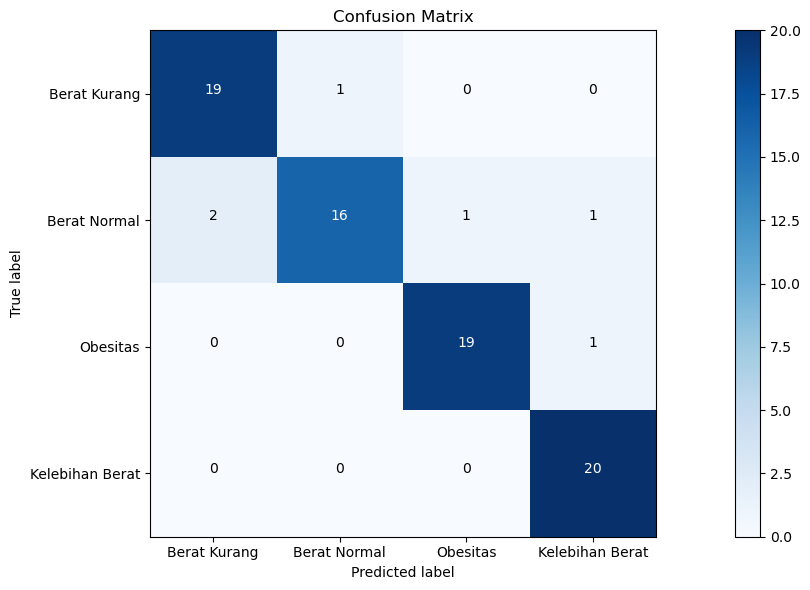

In [19]:
plt.figure(figsize=(16, 6))
plt.imshow(cm_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = y_test_new.unique()  # Mengambil kelas unik dari y_test_new
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(cm_new.shape[0]):
    for j in range(cm_new.shape[1]):
        plt.text(j, i, format(cm_new[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_new[i, j] > cm_new.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Hitung akurasi precision, recall, dan f-score

In [20]:
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print('Akurasi Testing SVM :', accuracy_new)

P_new = precision_recall_fscore_support(y_test_new, y_pred_new, average='macro')
print("Precision : ", P_new[0])
print("Recall : ", P_new[1])
print("F Score : ", P_new[2])

Akurasi Testing SVM : 0.925
Precision :  0.9262573211102623
Recall :  0.925
F Score :  0.9235187713846251


# Import Pickle Dengan Algoritma Yang Memiliki Nilai Matriks Paling Tinggi

In [27]:
import pickle

# Latih model SVM pada dataset latih{
svm_model = svm_pipeline.fit(X_train, y_train)

# Simpan model ke file menggunakan pickle
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)
